In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predicting-heart-disease-risk-using-clinical-var/Heart_Disease_Prediction.csv


In [2]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [3]:
import pandas as pd
loan_data = pd.read_csv("/kaggle/input/predicting-heart-disease-risk-using-clinical-var/Heart_Disease_Prediction.csv")
loan_data.head(10)

,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
5,5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,Absence
6,6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,Presence
7,7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,Presence
8,8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,Presence
9,9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,Presence


In [4]:
loan_data.isnull().sum()

index                      0
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [5]:
label_encoder = preprocessing.LabelEncoder()
loan_data.columns

Index(['index', 'Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol',
       'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina',
       'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium',
       'Heart Disease'],
      dtype='object')

In [6]:
label_encoder_y = preprocessing.LabelEncoder() 

In [7]:
loan_data['Heart Disease'] = label_encoder.fit_transform(loan_data['Heart Disease'])
print(loan_data[['Heart Disease']])

     Heart Disease
0                1
1                0
2                1
3                0
4                0
..             ...
265              0
266              0
267              0
268              0
269              1

[270 rows x 1 columns]


In [8]:
selected_features = {'Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol',
       'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina',
       'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium'}
selected_features

{'Age',
 'BP',
 'Chest pain type',
 'Cholesterol',
 'EKG results',
 'Exercise angina',
 'FBS over 120',
 'Max HR',
 'Number of vessels fluro',
 'ST depression',
 'Sex',
 'Slope of ST',
 'Thallium'}

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
x = loan_data.drop(columns=['Heart Disease'])  
y = loan_data['Heart Disease']  
numerical_columns = ['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol',
       'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina','ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium']

x[numerical_columns] = scaler.fit_transform(x[numerical_columns])


print("Scaled Feature Variables (x):")
print(x.head())

print("\nTarget Variable (y):")
print(y.head())

Scaled Feature Variables (x):
   index       Age       Sex  Chest pain type        BP  Cholesterol  \
0      0  1.712094  0.689500         0.870928 -0.075410     1.402212   
1      1  1.382140 -1.450327        -0.183559 -0.916759     6.093004   
2      2  0.282294  0.689500        -1.238045 -0.411950     0.219823   
3      3  1.052186  0.689500         0.870928 -0.187590     0.258589   
4      4  2.152032 -1.450327        -1.238045 -0.636310     0.374890   

   FBS over 120  EKG results    Max HR  Exercise angina  ST depression  \
0     -0.417029     0.981664 -1.759208        -0.701222       1.181012   
1     -0.417029     0.981664  0.446409        -0.701222       0.481153   
2     -0.417029    -1.026285 -0.375291        -0.701222      -0.656118   
3     -0.417029    -1.026285 -1.932198         1.426081      -0.743600   
4     -0.417029     0.981664 -1.240239         1.426081      -0.743600   

   Slope of ST  Number of vessels fluro  Thallium  
0     0.676419                 2.472682 

In [11]:
from sklearn.decomposition import PCA
n_components = 5  
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(x)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

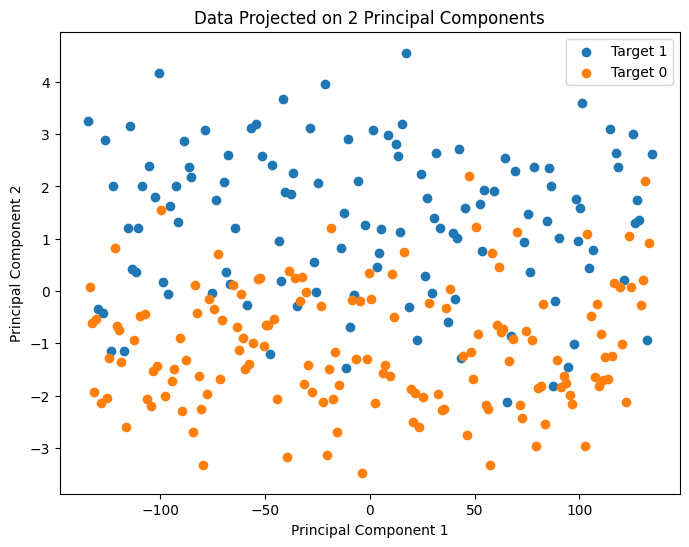

In [12]:
projected_data = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, n_components + 1)])
projected_data['Target'] = loan_data['Heart Disease']  # Include the target column if applicable

# Visualize the projected data
plt.figure(figsize=(8, 6))
for target_value in loan_data['Heart Disease'].unique():
    subset = projected_data[projected_data['Target'] == target_value]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Target {target_value}')

plt.title(f'Data Projected on {2} Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [13]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
optimal_k = 2

In [14]:
kmeans = KMeans(n_clusters=optimal_k)
kmeans_labels = kmeans.fit_predict(x)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
dbi_kmeans = davies_bouldin_score(x, kmeans_labels)

NameError: name 'davies_bouldin_score' is not defined

In [ ]:
silhouette_kmeans = silhouette_score(x, kmeans_labels)

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)
plt.figure(figsize=(8, 6))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', edgecolors='k', s=50)
plt.title('PCA Sonrası K-means')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
print(f"K-means - Silhouette Skoru: {silhouette_kmeans}")

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [ ]:
pca = PCA(n_components=5)
x_pca = pca.fit_transform(x)
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca, y)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

def train_model(x_train,y_train,x_test, y_test,model,plot_boundary=False, title=""):
    # Train the logistic regression model
    model.fit(x_train, y_train)

    # Predict on the test set
    y_pred = model.predict(x_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate precision, recall, and F1 score
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')


    # Generate a confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
    y_probs = model.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc = roc_auc_score(y_test, y_probs)


    plt.subplot(1, 2, 2)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

    plt.tight_layout()
    plt.show()
   

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

In [ ]:
logistic_reg = LogisticRegression()
train_model(x_train, y_train, x_test, y_test, logistic_reg)
